In [2]:
#cca ...>complete case analysis
#df...> missing data ....> filter missing data ....>
# new_df= filtered_columns_in_which_we_have_missing_data

#new_df ...> misssing_data_drop

#Architecture ....> Histogram .....>
#past column in which we have no missing data

#updated column in which we have no missing data

#if past data architecture is overlap to new data archit. .....> it means we can drop missing data
#if past data architecture is not overlap to new data architecture .....> it means  we can not dropmissing data

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('dsjob - dsjob.csv')

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [7]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [8]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [9]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
2111,no_enrollment,Graduate,6,1
238,Full time course,Masters,7,1
943,no_enrollment,Primary School,19,>4
1651,Full time course,High School,4,never
703,no_enrollment,Graduate,1,1


In [10]:
df['education_level'].value_counts()

education_level
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: count, dtype: int64

In [11]:
len(df[cols].dropna())/len(df)

0.9478628464067638

In [20]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((2129, 13), (2018, 4))

In [21]:
import matplotlib.pyplot as plt

<Axes: >

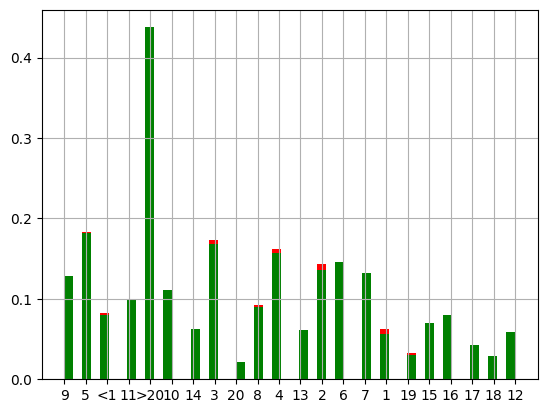

In [23]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['experience'].hist(bins=50,ax=ax,density=True,color='red')

#data after cca,the argument alphamakes the color transparent,so we can see the overlay of the 2 distributions
new_df['experience'].hist(bins=50,ax=ax,density=True,color='green')

In [25]:
temp=pd.concat([
    #percentage of observations per category,original data
    df['enrolled_university'].value_counts()/len(df),
    #percentage of observations per category,cca data
    new_df['enrolled_university'].value_counts()/len(new_df)
],
    axis=1)
#add column names
temp.columns=['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871
